# Artificial Intelligence (CS6364-002) 
## Homework 5
## Submission by - Adithya Sundararajan Iyer (asi200000)


In this question, we aim to solve the “cliff walking” zero-sum game using the minimax search method with (only part-c) and without the alpha-beta pruning with the depth limited to d layers (d=2 for part (a) and d=6 for part (b, c) )

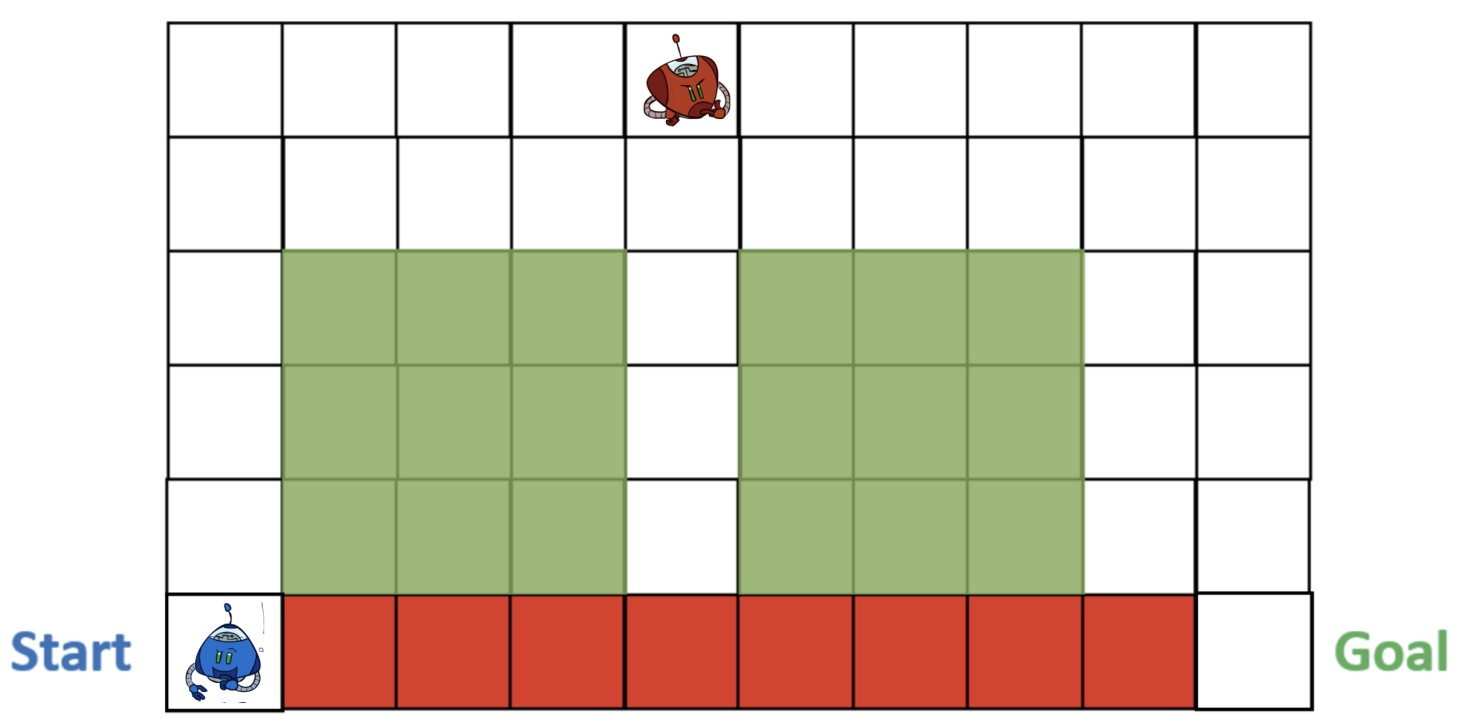

First we initialize the grid with the costs for different regions

In [1]:
import math

# non-water region throughout initially
grid = [[1 for j in range(10)] for i in range(6)] 
grid[-1][0] = 0 # assume zero cost at starting point

# modify cost for water regions
for i in range(2,5):
  for j in range(1,4):
    grid[i][j] = 5
  for j in range(5,8):
    grid[i][j] = 5

# modify cost for cliff = +inf
for j in range(1,9):
  grid[-1][j] = math.inf

print(grid)

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 5, 5, 5, 1, 5, 5, 5, 1, 1], [1, 5, 5, 5, 1, 5, 5, 5, 1, 1], [1, 5, 5, 5, 1, 5, 5, 5, 1, 1], [0, inf, inf, inf, inf, inf, inf, inf, inf, 1]]


Now we initialize the heuristics grid to give the manhattan distance of each point for the Blue Agent from the Goal (avoiding the cliff)

In [2]:
heur = [[math.inf for j in range(10)] for i in range(6)] 

for i in range(5):
  for j in range(10):
    heur[i][j] = (5-i)+(9-j)

heur[5][0] = 11 # manhattan distance of start from goal (avoiding cliff)
heur[5][9] = 0 # manhattan distance of goal

print(heur)

[[14, 13, 12, 11, 10, 9, 8, 7, 6, 5], [13, 12, 11, 10, 9, 8, 7, 6, 5, 4], [12, 11, 10, 9, 8, 7, 6, 5, 4, 3], [11, 10, 9, 8, 7, 6, 5, 4, 3, 2], [10, 9, 8, 7, 6, 5, 4, 3, 2, 1], [11, inf, inf, inf, inf, inf, inf, inf, inf, 0]]


Now we are ready to initialize path and positions of the agents

In [3]:
red, blue, goal = [0,4], [5,0], [5,9] # (5,1), (6,1), (6,10) if 1-indexed
rpath, bpath = [[1,5]], [[6,1]]
bcost = 0

def nextSteps(cd, nt=[]):
  if cd==[5,0]:
    return [[4,0]]
  x, y = cd
  ret = []
  if x<4 or (x==4 and y in [0,9]):
    ret.append([x+1,y])
  if x>0:
    ret.append([x-1,y])
  if y<9:
    ret.append([x,y+1])
  if y>0:
    ret.append([x,y-1])
  if nt and nt in ret:
    ret.remove(nt)
  return ret

print('Starting blue and red coordinates:', bpath[0], rpath[0])
print('Blue Agent starting cost:', bcost)


Starting blue and red coordinates: [6, 1] [1, 5]
Blue Agent starting cost: 0


In [4]:
def utility(rcd, bcd):
  rx, ry = rcd
  bx, by = bcd
  # util = 0
  # if bt:
  #   util = -1 * heur[bx][by] + 0.5 *abs(rx-ry)
  # else:
  #   util = -1 * heur[bx][by] + 2* abs(rx-ry)
  util = -1 * heur[bx][by] + abs(rx-bx)
  return util


In [5]:
def minimax(blue, red, maximizing, bcost):
  if maximizing:
    steps = nextSteps(blue, red)
    bb = len(steps)
    if bb==1:
      ind = 0
    else:
      opp = nextSteps(red)
      rr = len(opp)
      ind = -1
      bscores = [100 for i in range(bb)]
      for i in range(bb):
        bcurr = steps[i]
        bnext = nextSteps(bcurr)
        bchoice = [-100 for j in range(rr)]
        for j in range(rr):
          rcurr = opp[j]
          for bn in bnext:
            util = utility(rcurr, bn)
            bchoice[j] = max(bchoice[j], util)
          bscores[i] = min(bscores[i], bchoice[j])
      maxscore = -100
      for i in range(bb):
        if bscores[i]>maxscore:
          ind = i
          maxscore = bscores[i]
    blue = steps[ind]
    x,y = blue
    bcost += grid[x][y]
    bpath.append([x+1,y+1])
  else:
    steps = nextSteps(red, blue)
    rr = len(steps)
    ind = 0
    if rr==1:
      ind = 0
    else:
      opp = nextSteps(blue)
      bb = len(opp)
      ind = -1
      rscores = [-100 for i in range(rr)]
      for i in range(rr):
        rcurr = steps[i]
        rnext = nextSteps(rcurr)
        rchoice = [100 for j in range(bb)]
        for j in range(bb):
          bcurr = opp[j]
          for rn in rnext:
            util = utility(rn, bcurr)
            rchoice[j] = min(rchoice[j], util)
          rscores[i] = max(rscores[i], rchoice[j])
      minscore = 100
      for i in range(rr):
        if rscores[i]<minscore:
          ind = i
          minscore = rscores[i]
    red = steps[ind]
    x,y = red
    rpath.append([x+1,y+1])
  return (blue, red, bcost)


In [6]:
while(blue!=goal and bcost<100):
  blue, red, bcost = minimax(blue, red, True, bcost)
  blue, red, bcost = minimax(blue, red, False, bcost)

print('Path of the blue agent:', bpath)
print('Path of the red agent:', rpath)

if bcost>=100:
  print('Blue agent never made it to goal. Blue path cost:', 100)
else:
  print('Cost of the blue agent:', bcost)


Path of the blue agent: [[6, 1], [5, 1], [5, 2], [5, 3], [5, 4], [4, 4], [5, 4], [4, 4], [5, 4], [4, 4], [5, 4], [4, 4], [5, 4], [4, 4], [5, 4], [4, 4], [5, 4], [4, 4], [5, 4], [4, 4], [5, 4], [4, 4]]
Path of the red agent: [[1, 5], [2, 5], [3, 5], [4, 5], [5, 5], [4, 5], [5, 5], [4, 5], [5, 5], [4, 5], [5, 5], [4, 5], [5, 5], [4, 5], [5, 5], [4, 5], [5, 5], [4, 5], [5, 5], [4, 5], [5, 5], [4, 5]]
Blue agent never made it to goal. Blue path cost: 100


Now we try to do the minimax problem for depth d=6 without pruning

In [7]:
# re-initialize the values

red, blue, goal = [0,4], [5,0], [5,9] # (5,1), (6,1), (6,10) if 1-indexed
rpath, bpath = [[1,5]], [[6,1]]
bcost = 0

def minimaxd(rdcd, blcd, maximizing, depth):

  if maximizing:
    bsteps = nextSteps(blcd, rdcd)
    bb = len(bsteps)
    if bb==1:
      return bsteps[0], utility(rdcd, bsteps[0])
    bevals = [utility(rdcd, bc) for bc in bsteps]
    if depth<6:
      for i in range(bb):
        xtra, bevals[i] = minimaxd(rdcd, bsteps[i], False, depth+1)
    util = max(bevals)
    return bsteps[bevals.index(util)], util
  else:
    rsteps = nextSteps(rdcd, blcd)
    rr = len(rsteps)
    if rr==1:
      return rsteps[0], utility(blcd, rsteps[0])
    revals = [utility(blcd, rd) for rd in rsteps]
    if depth<6:
      for i in range(rr):
        xtra, revals[i] = minimaxd(blcd, rsteps[i], True, depth+1)
    util = min(revals)
    return rsteps[revals.index(util)], util


In [8]:
while(blue!=goal and bcost<100):
  blue, util = minimaxd(red, blue, True, 0)
  x,y = blue
  bpath.append([x+1,y+1])
  bcost += grid[x][y]
  red, util = minimaxd(red, blue, False, 0)
  x,y = red
  rpath.append([x+1,y+1])

print('Path of the blue agent:', bpath)
print('Path of the red agent:', rpath)

if bcost>=100:
  print('Blue agent never made it to goal. Blue path cost:', 100)
else:
  print('Cost of the blue agent:', bcost)


Path of the blue agent: [[6, 1], [5, 1], [5, 2], [5, 3], [4, 3], [3, 3], [2, 3], [1, 3], [2, 3], [3, 3], [4, 3], [5, 3], [4, 3], [3, 3], [2, 3], [1, 3], [2, 3], [3, 3], [4, 3], [5, 3], [4, 3], [3, 3], [2, 3], [1, 3], [2, 3], [3, 3], [4, 3], [5, 3], [4, 3]]
Path of the red agent: [[1, 5], [2, 5], [3, 5], [4, 5], [5, 5], [4, 5], [3, 5], [2, 5], [1, 5], [2, 5], [3, 5], [4, 5], [5, 5], [4, 5], [3, 5], [2, 5], [1, 5], [2, 5], [3, 5], [4, 5], [5, 5], [4, 5], [3, 5], [2, 5], [1, 5], [2, 5], [3, 5], [4, 5], [5, 5]]
Blue agent never made it to goal. Blue path cost: 100


Now we implement alpha-beta pruning in the minimax algorithm

In [9]:
# re-initialize the values

red, blue, goal = [0,4], [5,0], [5,9] # (5,1), (6,1), (6,10) if 1-indexed
rpath, bpath = [[1,5]], [[6,1]]
bcost = 0

def minimaxab(rdcd, blcd, maximizing, depth, alpha=-math.inf, beta=math.inf):

  if maximizing:
    v = -math.inf
    bsteps = nextSteps(blcd, rdcd)
    bb = len(bsteps)
    if bb==1:
      return bsteps[0], utility(rdcd, bsteps[0])
    bevals = [utility(rdcd, bc) for bc in bsteps]
    if depth<6:
      for i in range(bb):
        xtra, bevals[i] = minimaxd(rdcd, bsteps[i], False, depth+1)
        v = max(v, bevals[i])
        if v>=beta:
          return bsteps[bevals.index(v)], v
        alpha = max(alpha, v)
    return bsteps[bevals.index(v)], v
  else:
    v = math.inf
    rsteps = nextSteps(rdcd, blcd)
    rr = len(rsteps)
    if rr==1:
      return rsteps[0], utility(blcd, rsteps[0])
    revals = [utility(blcd, rd) for rd in rsteps]
    if depth<6:
      for i in range(rr):
        xtra, revals[i] = minimaxd(blcd, rsteps[i], True, depth+1)
        v = min(v, revals[i])
        if v<=alpha:
          return rsteps[revals.index(v)], v
        beta = min(beta, v)
    return rsteps[revals.index(v)], v


In [10]:
while(blue!=goal and bcost<100):
  blue, util = minimaxd(red, blue, True, 0)
  x,y = blue
  bpath.append([x+1,y+1])
  bcost += grid[x][y]
  red, util = minimaxd(red, blue, False, 0)
  x,y = red
  rpath.append([x+1,y+1])

print('Path of the blue agent:', bpath)
print('Path of the red agent:', rpath)

if bcost>=100:
  print('Blue agent never made it to goal. Blue path cost:', 100)
else:
  print('Cost of the blue agent:', bcost)


Path of the blue agent: [[6, 1], [5, 1], [5, 2], [5, 3], [4, 3], [3, 3], [2, 3], [1, 3], [2, 3], [3, 3], [4, 3], [5, 3], [4, 3], [3, 3], [2, 3], [1, 3], [2, 3], [3, 3], [4, 3], [5, 3], [4, 3], [3, 3], [2, 3], [1, 3], [2, 3], [3, 3], [4, 3], [5, 3], [4, 3]]
Path of the red agent: [[1, 5], [2, 5], [3, 5], [4, 5], [5, 5], [4, 5], [3, 5], [2, 5], [1, 5], [2, 5], [3, 5], [4, 5], [5, 5], [4, 5], [3, 5], [2, 5], [1, 5], [2, 5], [3, 5], [4, 5], [5, 5], [4, 5], [3, 5], [2, 5], [1, 5], [2, 5], [3, 5], [4, 5], [5, 5]]
Blue agent never made it to goal. Blue path cost: 100
